### Prepared by: Nisha Mundanthara Suresh Babu

## <font color = blue> IMPORTS

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
import numpy as np
import sklearn

## <font color = blue> LOAD DATASETS

In [2]:
load_test = 'test_data_2'
load_test_labels = 'test_labels_2'

load_train = 'train_data_2'
load_train_labels = 'train_labels_2'


train_images = torch.load(load_train)
test_images = torch.load(load_test)

train_labels = torch.load(load_train_labels).long()
test_labels = torch.load(load_test_labels).long()

## <font color = blue> EXPLORE THE DATA

In [3]:
train_images.shape, test_images.shape

(torch.Size([50000, 3, 32, 32]), torch.Size([10000, 3, 32, 32]))

In [4]:
train_labels.shape, test_labels.shape

(torch.Size([50000]), torch.Size([10000]))

The Corrosponding Label is: 7


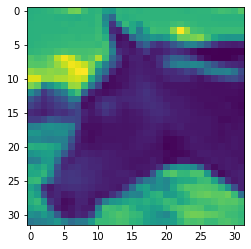

In [5]:
sample_num = 11
print(f'The Corrosponding Label is: {train_labels[sample_num]}')

plt.imshow(train_images[sample_num][0])
plt.show()
      
      

In [6]:
n_classes = len(np.unique(train_labels))
n_classes

10

### <font color = blue> CPU/GPU SELECTION 

In [7]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on the GPU")
else:
    device = torch.device("cpu")
    print("running on the CPU")

running on the CPU


## Qn1

## <font color = blue> BASIC SIMPLE NEURAL NETWORK

### <font color = blue> FLATTEN DATA

In [8]:
train_images_flat = train_images.view(train_images.shape[0], -1)  # Convert to 1 dimensional data
test_images_flat = test_images.view(test_images.shape[0], -1)

In [9]:
print(train_images_flat.shape, test_images_flat.shape)

torch.Size([50000, 3072]) torch.Size([10000, 3072])


In [10]:
#Simple Neural Network
class Simple_NN(nn.Module):
    
    def __init__(self, n_features):
        super().__init__()
        
        self.fc1 = nn.Linear(n_features, 1650) # 3072 * 1650 eight
        self.fc2 = nn.Linear(1650, 512)
        self.fc3 = nn.Linear(512, 138)
        self.fc4 = nn.Linear(138,10)
        
    def forward(self, x):
       # x = xb.view(xb.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim = 1)
        
        return x



A simple neural network of 4 layers are created. Since the data is RGB 3 channels are used. The dimesion is 32x32. So the input parameter size is 3*32*32 = 3072. Rectified Linear Unit(RELU)  and log_softmax (for output layer) activation funtions are used.

### <font color = blue> CREATE CLASS OBJECT

In [11]:
net_simple = Simple_NN(n_features = 3072)
net_simple.to(device)

Simple_NN(
  (fc1): Linear(in_features=3072, out_features=1650, bias=True)
  (fc2): Linear(in_features=1650, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=138, bias=True)
  (fc4): Linear(in_features=138, out_features=10, bias=True)
)

### <font color = blue> CREATE LOSS FUNCTION

In [12]:
loss_function = nn.CrossEntropyLoss()


Cross Entropy Loss function is used here.

### <font color = blue> TRAINING LOOP 

In [13]:
epochs = 5 #no. of iterations
BATCH_SIZE = 100 # batch size

for epoch in range(epochs):
    for i in tqdm(range(0, len(train_images_flat), BATCH_SIZE)):
        
        batch_data = train_images_flat[i:i+BATCH_SIZE]
        batch_labels = train_labels[i:i+BATCH_SIZE]
        batch_data = batch_data.to(device)
        batch_labels = batch_labels.to(device)
        
        net_simple.zero_grad() # Settign Gradients to Zero
        output = net_simple.forward(batch_data) # Output MOdel
        loss = loss_function(output, batch_labels) #Error
        loss.backward() # dE/dw for every network parameter
       
        
    print(loss)

  1%|▍                                                                                 | 3/500 [00:00<00:23, 21.10it/s]

tensor(2.3081, grad_fn=<NllLossBackward0>)


  0%|▎                                                                                 | 2/500 [00:00<00:26, 19.13it/s]

tensor(2.3081, grad_fn=<NllLossBackward0>)


  0%|▎                                                                                 | 2/500 [00:00<00:27, 17.91it/s]

tensor(2.3081, grad_fn=<NllLossBackward0>)


  0%|▎                                                                                 | 2/500 [00:00<00:26, 18.57it/s]

tensor(2.3081, grad_fn=<NllLossBackward0>)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:28<00:00, 17.52it/s]

tensor(2.3081, grad_fn=<NllLossBackward0>)


While training different batch sizes were tested and selected 100 as optimal.

### <font color = blue> TESTING AND VALIDATION

In [14]:
#Testing & Validation
with torch.no_grad():
    predicted = net_simple.forward(test_images_flat.to(device))
    
    print(predicted[0:2], predicted[0:2].shape)
      
        
    predicted_classes = torch.argmax(predicted, dim = 1)
    print(predicted_classes[0:5])
    print(test_labels[0:5])
    
    predicted_classes = predicted_classes.to(torch.device('cpu'))
    test_labels = test_labels.to(torch.device('cpu'))

tensor([[-2.2835, -2.3698, -2.3407, -2.2206, -2.3804, -2.3093, -2.3318, -2.2149,
         -2.3745, -2.2204],
        [-2.3038, -2.3672, -2.3180, -2.2195, -2.3956, -2.2945, -2.3221, -2.2275,
         -2.4119, -2.1908]]) torch.Size([2, 10])
tensor([7, 9, 3, 9, 7])
tensor([3, 8, 8, 0, 6])


### <font color = blue>ACCURACY 

In [15]:
correct = 0
total = 0

for i in range(len(predicted_classes)):
    if predicted_classes[i] == test_labels[i]:
        correct += 1
    total += 1
    
print(f'Accuracy: ', round(correct/total, 3))

Accuracy:  0.123


No optimizations are used in the basic model. So the accuracy of the final model is 12%

## <font color = blue> BASIC CONVOLUTIONAL NEURAL NETWORK

In [16]:
class Conv_NN(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 6, kernel_size = 3)
        self.conv2 = nn.Conv2d(in_channels =6, out_channels = 16, kernel_size = 3)
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 120, kernel_size = 3)
        #self.conv4 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3)
        
        
        self.pool = nn.MaxPool2d((2,2))
        
        self.fc1 = nn.Linear(120*12*12, 84)
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x)) # First cnn layer
        #print(x.shape)
        
        #x = self.pool(x)
        #print(x.shape)
        
        x = F.relu(self.conv2(x))  # Second cnn layer
        #print(x.shape)
        
        x = self.pool(x) # max pooling
        #print(x.shape)
        x = F.relu(self.conv3(x)) ## third cnn layer
        #x = self.pool(x)
        #x = F.relu(self.conv4(x))
        x = x.view(-1, 120*12*12)
        
        x = F.relu(self.fc1(x))
        
        x = F.log_softmax(self.fc2(x), dim = 1)
                          
        return x


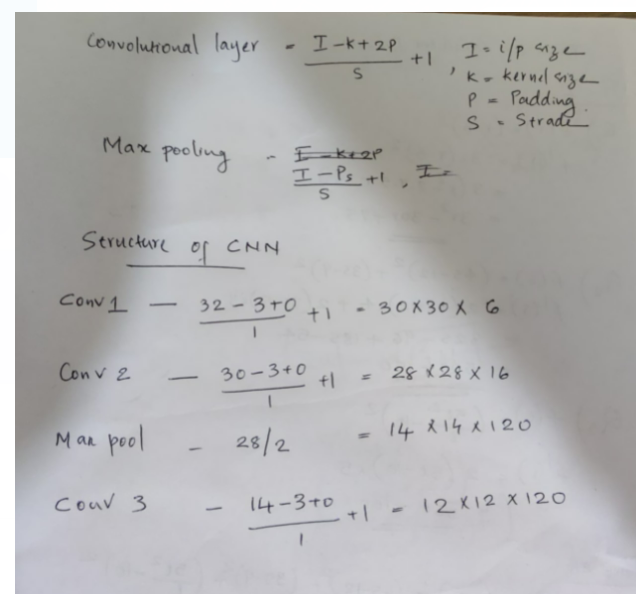

### <font color = blue> CLASS OBJEAT CREATION 

In [17]:
net_conv = Conv_NN(n_channels = 3)
net_conv.to(device)

Conv_NN(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=17280, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)

### <font color = blue> TRAINING LOOP 

In [18]:
epochs = 5
BATCH_SIZE = 100

for epoch in range(epochs):
    for i in tqdm(range(0, len(train_images), BATCH_SIZE)):
        
        batch_data = train_images[i:i+BATCH_SIZE]
        batch_labels = train_labels[i:i+BATCH_SIZE]
        batch_data = batch_data.to(device)
        batch_labels = batch_labels.to(device)
        
        net_conv.zero_grad() # Settign Gradients to Zero
        output = net_conv.forward(batch_data) # Output MOdel
        loss = loss_function(output, batch_labels) #Error
        loss.backward() # dE/dw for every network parameter
        
        
    print(loss)

  0%|▎                                                                                 | 2/500 [00:00<00:45, 11.05it/s]

tensor(2.3118, grad_fn=<NllLossBackward0>)


  0%|▎                                                                                 | 2/500 [00:00<00:38, 12.82it/s]

tensor(2.3118, grad_fn=<NllLossBackward0>)


  0%|▎                                                                                 | 2/500 [00:00<00:42, 11.69it/s]

tensor(2.3118, grad_fn=<NllLossBackward0>)


  0%|▎                                                                                 | 2/500 [00:00<00:39, 12.50it/s]

tensor(2.3118, grad_fn=<NllLossBackward0>)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:41<00:00, 11.94it/s]

tensor(2.3118, grad_fn=<NllLossBackward0>)


### <font color = blue> TESTING 

In [19]:
#Testing

with torch.no_grad():
    predicted = net_conv.forward(test_images.to(device))
    
    print(predicted[0:2], predicted[0:2].shape)
      
        
    predicted_classes = torch.argmax(predicted, dim = 1)
    print(predicted_classes[0:5])
    print(test_labels[0:5])
    
    predicted_classes = predicted_classes.to(torch.device('cpu'))
    test_labels = test_labels.to(torch.device('cpu'))

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:76] data. DefaultCPUAllocator: not enough memory: you tried to allocate 576000000 bytes.

### <font color = blue> ACCURACY 

In [ ]:
correct = 0
total = 0

for i in range(len(predicted_classes)):
    if predicted_classes[i] == test_labels[i]:
        correct += 1
    total += 1
    
print(f'Accuracy: ', round(correct/total, 3))

No optimizations are used in the basic model. So the accuracy of the basic convolutional model is 10%

## <font color = blue> OPTIMIZED SIMPLE NEURAL NETWORK

### <font color = blue> CREATE OPTIMIZER FUNCTION

In [ ]:

optimizer =  torch.optim.SGD(net_simple.parameters(), lr=0.01 )
optimizer_under =  torch.optim.SGD(net_simple.parameters(), lr=0.00000001 )
optimizer_over =  torch.optim.SGD(net_simple.parameters(), lr=10 )

### <font color = blue> TRAINING LOOP 

In [ ]:
epochs = 5
BATCH_SIZE = 100

for epoch in range(epochs):
    for i in tqdm(range(0, len(train_images_flat), BATCH_SIZE)):
        
        batch_data = train_images_flat[i:i+BATCH_SIZE]
        batch_labels = train_labels[i:i+BATCH_SIZE]
        batch_data = batch_data.to(device)
        batch_labels = batch_labels.to(device)
        
        net_simple.zero_grad() # Settign Gradients to Zero
        output = net_simple.forward(batch_data) # Output MOdel
        loss = loss_function(output, batch_labels) #Error
        loss.backward() # dE/dw for every network parameter
        optimizer.step() # 0.408
        #optimizer_under.step()0.073
        #optimizer_over.step()#.1
    print(loss)

### <font color = blue> TESTING AND VALIDATION

In [ ]:
#Testing & Validation
with torch.no_grad():
    predicted = net_simple.forward(test_images_flat.to(device))
    
    print(predicted[0:2], predicted[0:2].shape)
      
        
    predicted_classes = torch.argmax(predicted, dim = 1)
    print(predicted_classes[5:5])
    print(test_labels[0:5])
    
    predicted_classes = predicted_classes.to(torch.device('cpu'))
    test_labels = test_labels.to(torch.device('cpu'))

### <font color = blue> ACCURACY 

In [ ]:
correct = 0
total = 0

for i in range(len(predicted_classes)):
    if predicted_classes[i] == test_labels[i]:
        correct += 1
    total += 1
    
print(f'Accuracy: ', round(correct/total, 3))

In [ ]:
#Testing & Validation for train for checking over fitting
with torch.no_grad():
    predicted = net_simple.forward(train_images_flat.to(device))
    
    print(predicted[0:2], predicted[0:2].shape)
      
        
    predicted_classes = torch.argmax(predicted, dim = 1)
    print(predicted_classes[0:5])
    print(train_labels[0:5])
    
    predicted_classes = predicted_classes.to(torch.device('cpu'))
    train_labels = train_labels.to(torch.device('cpu'))

correct = 0
total = 0

for i in range(len(predicted_classes)):
    if predicted_classes[i] == train_labels[i]:
        correct += 1
    total += 1
    
print(f'Accuracy: ', round(correct/total, 3))

An SGD optimizer is used and an accuracy of 40 % is obtained.

## <font color = blue> OPTIMIZED CONVOLUTIONAL NEURAL NETWORK 

### <font color = blue> CREATE OPTIMIZER FUNCTION

In [ ]:
optimizer =  torch.optim.SGD(net_conv.parameters(), lr=0.01 )
optimizer_under =  torch.optim.SGD(net_conv.parameters(), lr=0.00000001 )
optimizer_over =  torch.optim.SGD(net_conv.parameters(), lr=10 )


In [ ]:
class Conv_NN(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 6, kernel_size = 3)
        self.conv2 = nn.Conv2d(in_channels =6, out_channels = 16, kernel_size = 3)
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 120, kernel_size = 3)
        #self.conv4 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3)
        # self.conv3 , self,conv4 ....
        
        self.pool = nn.MaxPool2d((2,2))
        
        self.fc1 = nn.Linear(120*6*6, 84)
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        #print(x.shape)
        
        #x = self.pool(x)
        #print(x.shape)
        
        x = F.relu(self.conv2(x))
        #print(x.shape)
        
        x = self.pool(x)
        #print(x.shape)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        #x = F.relu(self.conv4(x))
        x = x.view(-1, 120*6*6)
        
        x = F.relu(self.fc1(x))
        
        x = F.log_softmax(self.fc2(x), dim = 1)
                          
        return x

## <font color = blue> TRAINING LOOP

In [ ]:
epochs = 5
BATCH_SIZE = 100

for epoch in range(epochs):
    for i in tqdm(range(0, len(train_images), BATCH_SIZE)):
        
        batch_data = train_images[i:i+BATCH_SIZE]
        batch_labels = train_labels[i:i+BATCH_SIZE]
        batch_data = batch_data.to(device)
        batch_labels = batch_labels.to(device)
        
        net_conv.zero_grad() # Settign Gradients to Zero
        output = net_conv.forward(batch_data) # Output MOdel
        loss = loss_function(output, batch_labels) #Error
        loss.backward() # dE/dw for every network parameter
        #optimizer.step() # update network parameters
        #optimizer_under.step()
        optimizer_over.step()#.1
        
    print(loss)

## <font color = blue> TESTING

In [ ]:
#Testing

with torch.no_grad():
    predicted = net_conv.forward(test_images.to(device))
    
    print(predicted[0:2], predicted[0:2].shape)
      
        
    predicted_classes = torch.argmax(predicted, dim = 1)
    print(predicted_classes[0:5])
    print(test_labels[0:5])
    
    predicted_classes = predicted_classes.to(torch.device('cpu'))
    test_labels = test_labels.to(torch.device('cpu'))

## <font color = blue> ACCURACY

In [ ]:
correct = 0
total = 0

for i in range(len(predicted_classes)):
    if predicted_classes[i] == test_labels[i]:
        correct += 1
    total += 1
    
print(f'Accuracy: ', round(correct/total, 3))

An SGD optimizer is used and an accuracy of 41 % is obtained.